In [76]:
# Preparation for programming
# Make sure to execute this cell first!
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
from IPython.display import display, Math, Latex
from time import *
from obspy import *
from obspy.core import read, UTCDateTime
from obspy.clients.fdsn import Client
import numpy as np
import pandas as pd
from os import path
import os
import matplotlib.pylab as plt
from obspy.signal.filter import lowpass
from matplotlib.mlab import detrend
from obspy.signal.invsim import cosine_taper 
from mpl_toolkits.basemap import Basemap
from tabulate import tabulate
plt.style.use('ggplot')

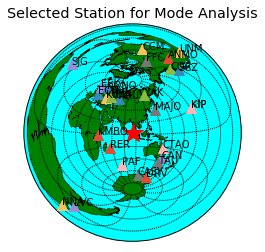

In [77]:
sta_list_mode=pd.read_csv('stationlist_mode_analysis.csv', sep=',',header=None)
sta_code=np.array(sta_list_mode[2])
sta_lat=np.array(sta_list_mode[6])
sta_lon=np.array(sta_list_mode[7])

lon_epic = 94.26; lat_epic = 3.09
m = Basemap(projection='aeqd',lat_0=lat_epic,lon_0=lon_epic)

# fill background.
m.drawmapboundary(fill_color='aqua')
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='green',lake_color='aqua')
# 20 degree graticule.
m.drawparallels(np.arange(-80,81,20))
m.drawmeridians(np.arange(-180,180,20))

# plot epicenter at the center.
xepic, yepic = m(lon_epic, lat_epic)
m.plot([xepic],[yepic],'r*', markersize=20.0)

#plot the station
xsta, ysta=m(sta_lon,sta_lat)
for i in range(len(sta_lat)):
    b= m.plot(xsta[i],ysta[i],'^', markersize=10.0)
    plt.text(xsta[i], ysta[i], sta_code[i])
    
#figure size
plt.rcParams['figure.figsize'] = 7,7

# draw the title.
plt.title('Selected Station for Mode Analysis')
plt.show()

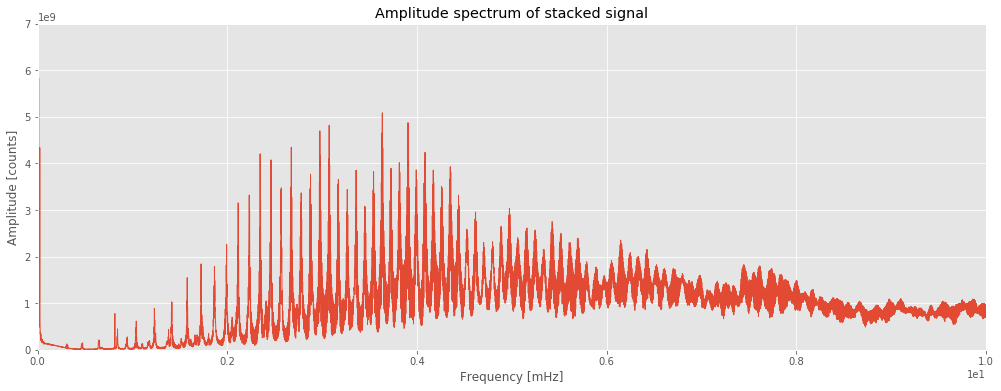

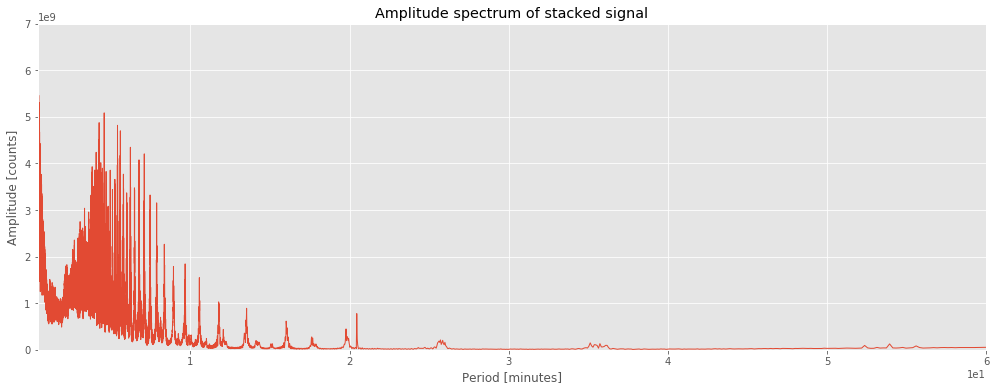

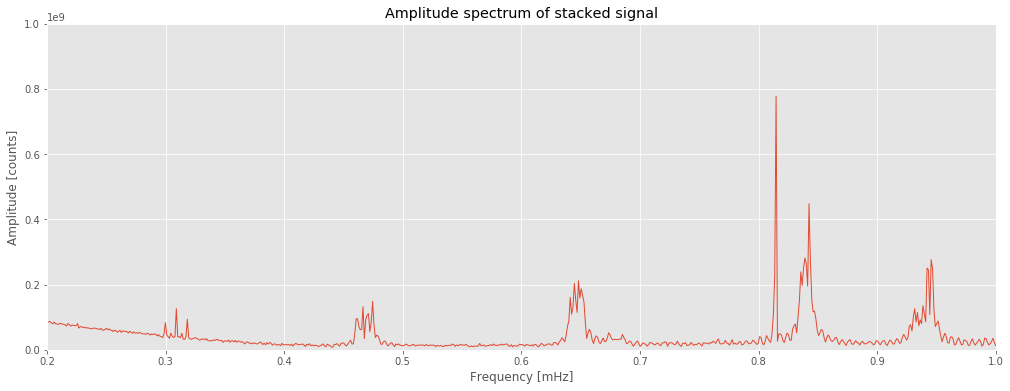

In [78]:
sta_fname_stack=np.array(sta_list_mode[1])
directory = "./data"
directory1 = "./fft"

#plotting parameter
plt.rcParams['figure.figsize'] = 17,6
plt.rcParams['lines.linewidth'] = 1

nsec=10*24*60*60 #convert 10 days into s
npts = nsec * 1 # sampling rate is 1 Hz
fNy = 1/2 #Nyquist Frequency is a half of sampling rate
taper_percentage = 0.005
taper= cosine_taper(nsec,taper_percentage)

st_stack=Stream()

for i in range (len(sta_fname_stack)):
    st_fft = read (path.join(directory1, sta_fname_stack[i]),header=None )
    st_fft_copy = Trace(abs(np.array((st_fft.copy())[0])))
    st_stack = st_stack.append(st_fft_copy)
    stack_fft = np.sum([tr.data for tr in st_stack], axis=0)


freq = np.linspace(0, fNy, len(stack_fft))     # Frequency axis for plotting
period = (1/freq)/60                           # Period in minutes for axis for plotting

# Plot the full spectrum of the signal
plt.plot(freq*1000, abs(stack_fft))
plt.title('Amplitude spectrum of stacked signal')
plt.xlabel('Frequency [mHz]')
plt.ylabel('Amplitude [counts]')
plt.xlim (0, 10)
plt.ylim (0, 0.7E10)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.show()

plt.plot(period, abs(stack_fft))
plt.title('Amplitude spectrum of stacked signal')
plt.xlabel('Period [minutes]')
plt.ylabel('Amplitude [counts]')
plt.xlim (0.4, 60)
plt.ylim (0, 0.7E10)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.show()

plt.plot(freq*1000, abs(stack_fft))
plt.title('Amplitude spectrum of stacked signal')
plt.xlabel('Frequency [mHz]')
plt.ylabel('Amplitude [counts]')
plt.xlim (0.2, 1)
plt.ylim (0, 1.0E9)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.show()

In [79]:
sta_fname_amp=np.array(sta_list_mode[1])
directory1 = "./fft"

plt.rcParams['figure.figsize'] = 17,6
amp_0S0 = []
amp_0S2 = []

for i in range (len(sta_fname_amp)):
    st1 = read (path.join(directory1, sta_fname_amp[i]),header=None )
    st1_copy = st1.copy()
    tr1 = st1_copy[0].data
    amp = abs(tr1[704])
    amp_0S0.append(amp) 

for i in range (len(sta_fname_amp)):
    st1 = read (path.join(directory1, sta_fname_amp[i]),header=None )
    st1_copy = st1.copy()
    tr1 = st1_copy[0].data
    amp = abs(tr1[267])
    amp_0S2.append(amp)
    
directory2 = "./amplitude"
if not path.exists(directory2):
    os.makedirs(directory2)

amp_list_0S0 = np.stack((sta_fname_amp, amp_0S0), axis=-1)    
np.savetxt(path.join(directory2, 'amp_0S0.out'), amp_list_0S0, delimiter=',', fmt='%s')
amp_list_0S2 = np.stack((sta_fname_amp, amp_0S2), axis=-1)    
np.savetxt(path.join(directory2, 'amp_0S2.out'), amp_list_0S2, delimiter=',', fmt='%s')
amp_list = np.stack((sta_fname_amp, amp_0S0, amp_0S2), axis=-1)
print (tabulate(amp_list, headers=['Station Code', 'Amplitude 0S0', 'Amplitude 0S2'], floatfmt=".5E"))


Station Code      Amplitude 0S0    Amplitude 0S2
--------------  ---------------  ---------------
ANMO00              1.76316E+07      1.76041E+06
ARU                 5.25594E+07      8.01516E+06
CAN                 1.41437E+07      4.52469E+04
CASY00              3.03314E+07      8.43738E+06
CCM                 2.61265E+07      4.02354E+06
COR                 2.87017E+07      2.47446E+06
CTAO                3.05801E+07      5.95298E+06
DRV                 6.69829E+06      1.80578E+06
ECH                 7.75836E+06      3.08233E+05
ESK                 4.73458E+07      9.34042E+06
FFC                 5.44105E+07      9.39127E+06
KIEV                3.15494E+07      7.33437E+06
KIP_G00             2.68827E+07      5.82586E+06
KIP_IU00            2.68827E+07      5.82586E+06
KMBO                3.36720E+07      7.33197E+06
KONO00              2.98914E+07      7.79860E+06
LVC00               3.21885E+07      1.82611E+06
MAJO                3.23258E+07      1.91781E+06
NNA                 

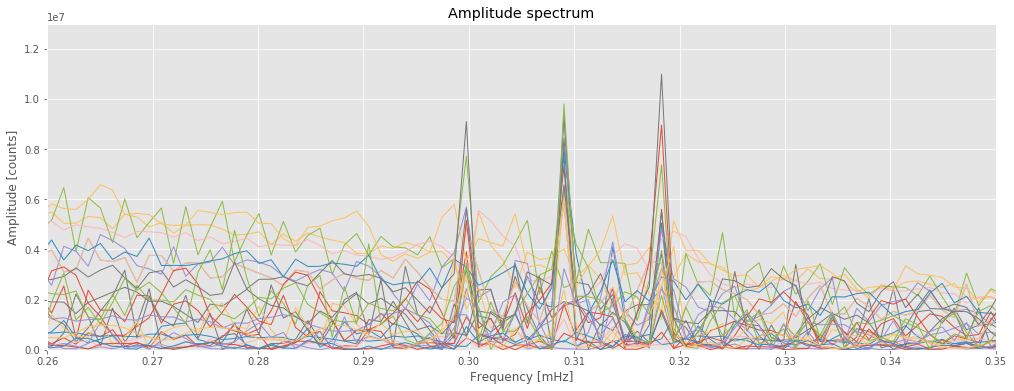

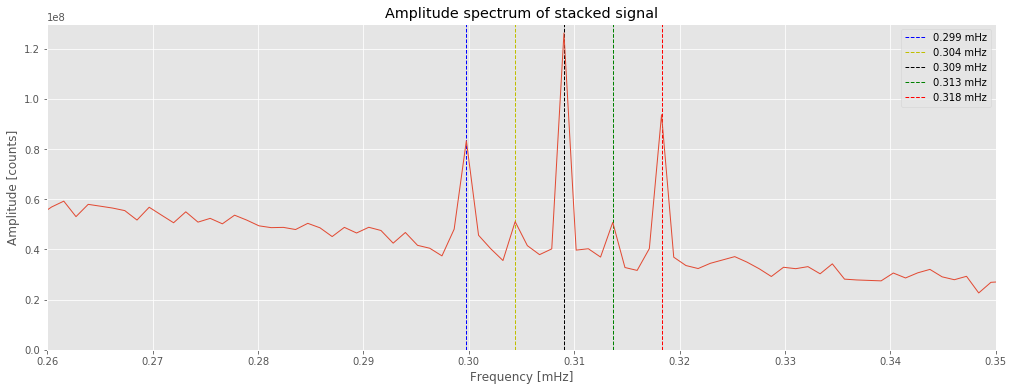

In [80]:
sta_fname_fft=np.array(sta_list_mode[1])

plt.rcParams['figure.figsize'] = 17,6

for i in range (len(sta_fname_fft)):
    st1 = read (path.join(directory1, sta_fname_fft[i]),header=None )
    st1_copy = st1.copy()
    tr1 = st1_copy[0].data
    plt.plot(freq*1000, abs(tr1), lw=1) 
   
     
plt.title('Amplitude spectrum')
plt.xlabel('Frequency [mHz]')
plt.ylabel('Amplitude [counts]')
plt.xlim (0.26, 0.35)
plt.ylim (0, 1.3E7)
#plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.show()

fpeak = [0.299768518518518, 0.304398148148148, 0.309027777777777, 0.313657407407407, 0.318287037037037]
color = ['b','y','k','g','r']
label = ['0.299 mHz','0.304 mHz','0.309 mHz','0.313 mHz','0.318 mHz']

for i in range(len(fpeak)):
    c = plt.axvline(fpeak[i], color=color[i], label=label[i], lw=1, linestyle='--')
    
plt.plot(freq*1000, abs(stack_fft))    
plt.title('Amplitude spectrum of stacked signal')
plt.xlabel('Frequency [mHz]')
plt.ylabel('Amplitude [counts]')
plt.xlim (0.26, 0.35)
plt.ylim (0, 1.3E8)
#plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.legend()
plt.show()


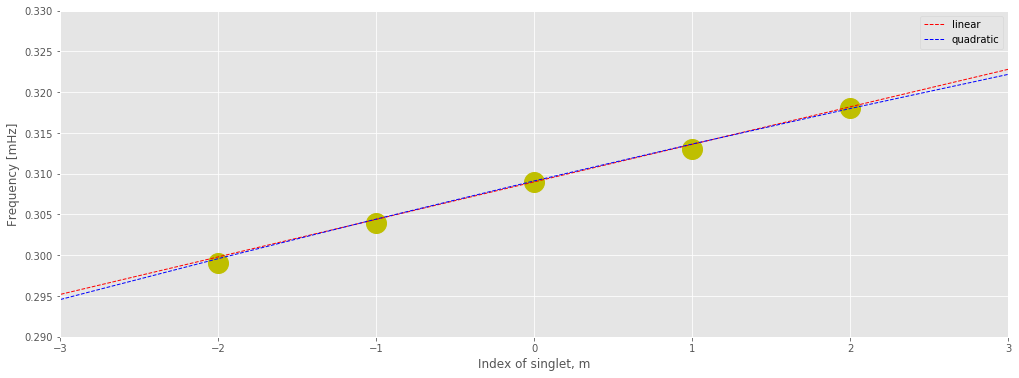

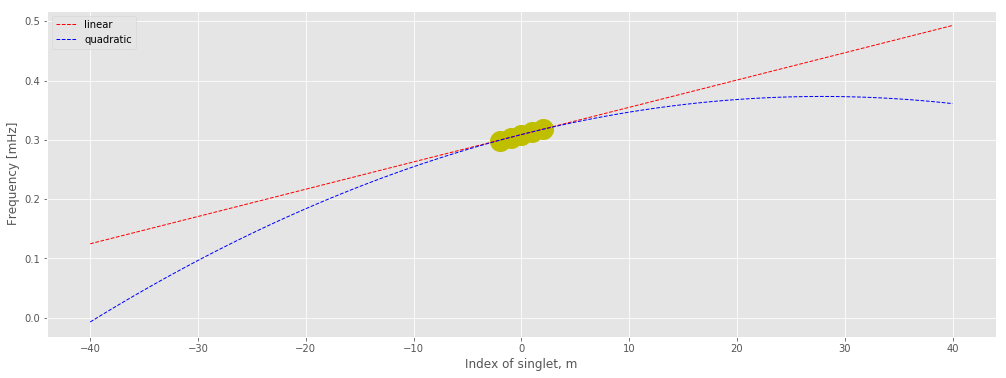

In [81]:
def linear_pred (idx):
    return (0.309E-3*(1+(14.9E-3*idx)))*1000

def quadratic_pred (idx):
    return (0.309E-3*(1+0.376E-3+(14.905E-3*idx)+(-0.267E-3*(idx**2))))*1000

idx_singlet = np.linspace(-40, 40, num=81)
lin = linear_pred (idx_singlet)
quad = quadratic_pred (idx_singlet)

idx_obs=[-2,-1,0,1,2]
freq_singlet=[0.299, 0.304, 0.309, 0.313, 0.318]

plt.rcParams['figure.figsize'] = 17,6

plt.plot (idx_obs, freq_singlet, 'oy', markersize=20)
plt.plot (idx_singlet, lin, '--r', label='linear')
plt.plot (idx_singlet, quad, '--b', label='quadratic')
plt.ylabel('Frequency [mHz]')
plt.xlabel('Index of singlet, m')
plt.xlim (-3, 3)
plt.ylim (0.29, 0.33)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend ()
plt.show()  

plt.plot (idx_obs, freq_singlet, 'oy', markersize=20)
plt.plot (idx_singlet, lin, '--r', label='linear')
plt.plot (idx_singlet, quad, '--b', label='quadratic')
plt.ylabel('Frequency [mHz]')
plt.xlabel('Index of singlet, m')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend ()
plt.show()    

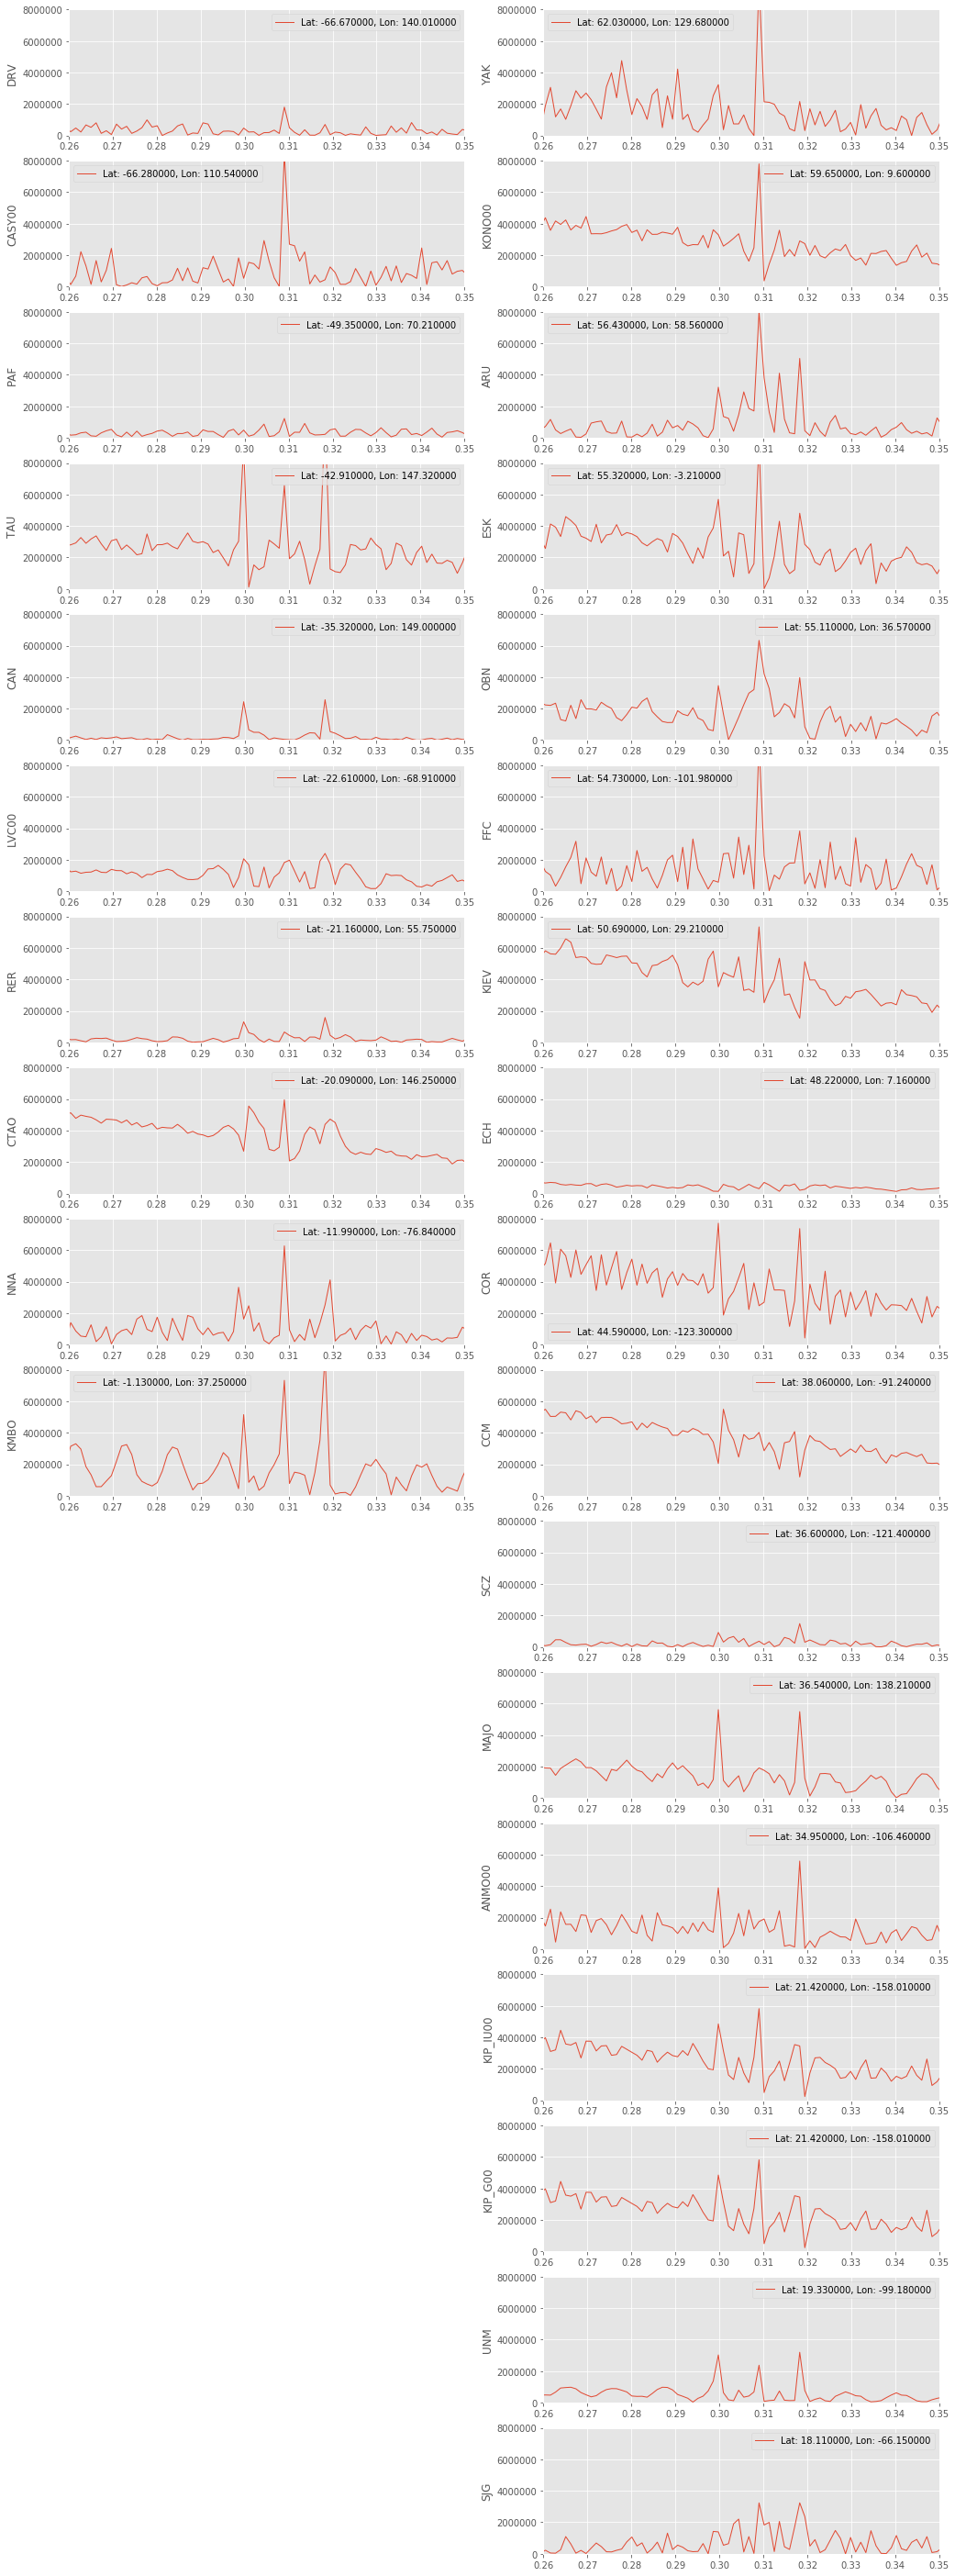

In [99]:
# Station list sorted by latitude (lowest to largest)
sta_list_lat = pd.read_csv('stationlist_sort_lat.csv', sep=',',header=None) 
sta_fname_lat=np.array(sta_list_lat[1])
sta_lat =sta_list_lat[6]
sta_lon =sta_list_lat[7]

north = 17 # number of stations in the north hemisphere
subplot_north = np.linspace(2, 2*north, north)
south = 10 # number of stations in the north southsphere
subplot_south = np.linspace (1,2*south-1,south)
plt.rcParams['figure.figsize'] = 17,(3*north)

for i in range (0,south):
    st1 = read (path.join(directory1, sta_fname_lat[i]),header=None )
    st1_copy = st1.copy()
    tr1 = st1_copy[0].data
    plt.subplot(north,2,subplot_south[i])
    plt.plot(freq*1000, abs(tr1), lw=1, label=('Lat: %f, Lon: %f' %(sta_lat[i], sta_lon[i])))
    plt.ylabel(sta_fname_lat[i])
    plt.xlim (0.26, 0.35)
    plt.ylim (0, 0.8E7)
    #plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    plt.legend()

for i in range (south,north+south):
    st1 = read (path.join(directory1, sta_fname_lat[i]),header=None )
    st1_copy = st1.copy()
    tr1 = st1_copy[0].data
    plt.subplot(north,2,subplot_north[north+south-i-1])
    plt.plot(freq*1000, abs(tr1), lw=1, label=('Lat: %f, Lon: %f' %(sta_lat[i], sta_lon[i])))
    plt.ylabel(sta_fname_lat[i])
    plt.xlim (0.26, 0.35)
    plt.ylim (0, 0.8E7)
    #plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    plt.legend()

plt.show()   


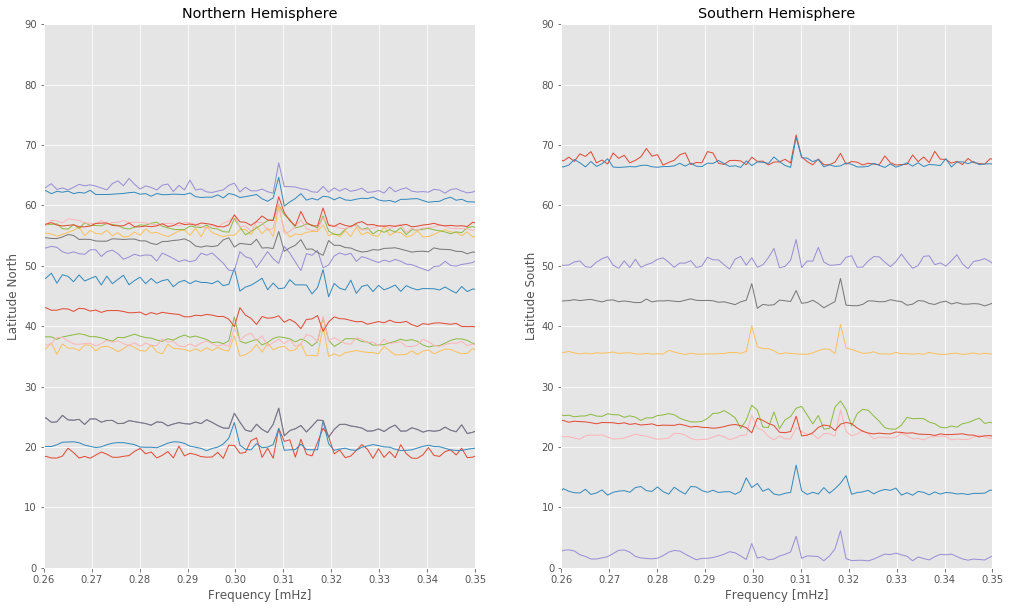

In [98]:
sta_list_lat = pd.read_csv('stationlist_sort_lat.csv', sep=',',header=None) 
sta_fname_lat=np.array(sta_list_lat[1])
sta_lat =sta_list_lat[6]
sta_lon =sta_list_lat[7]

#plotting parameter
plt.rcParams['figure.figsize'] = 17,10
plt.rcParams['lines.linewidth'] = 1

dlat = 5

for i in range (0, len(sta_fname_lat)):
    st1 = read(path.join(directory1, sta_fname_lat[i]),header=None )
    st1_copy = st1.copy()
    tr1 = np.array(abs(st1_copy[0].data))   
    
    tr_max = tr1[225:302].max()
    tr1_lat = tr1/tr_max * dlat + abs(sta_lat[i])
    
    if sta_lat[i] > 0:
        plt.subplot(1,2,1)
        plt.plot(freq*1000, abs(tr1_lat))
        plt.ylabel('Latitude North')
        plt.title('Northern Hemisphere')

    else:
        plt.subplot(1,2,2)
        plt.plot(freq*1000, abs(tr1_lat))
        plt.ylabel('Latitude South')
        plt.title('Southern Hemisphere')
            
    plt.xlabel('Frequency [mHz]')
    plt.xlim (0.26, 0.35)
    plt.ylim (0, 90)
    plt.legend()
    
plt.show()

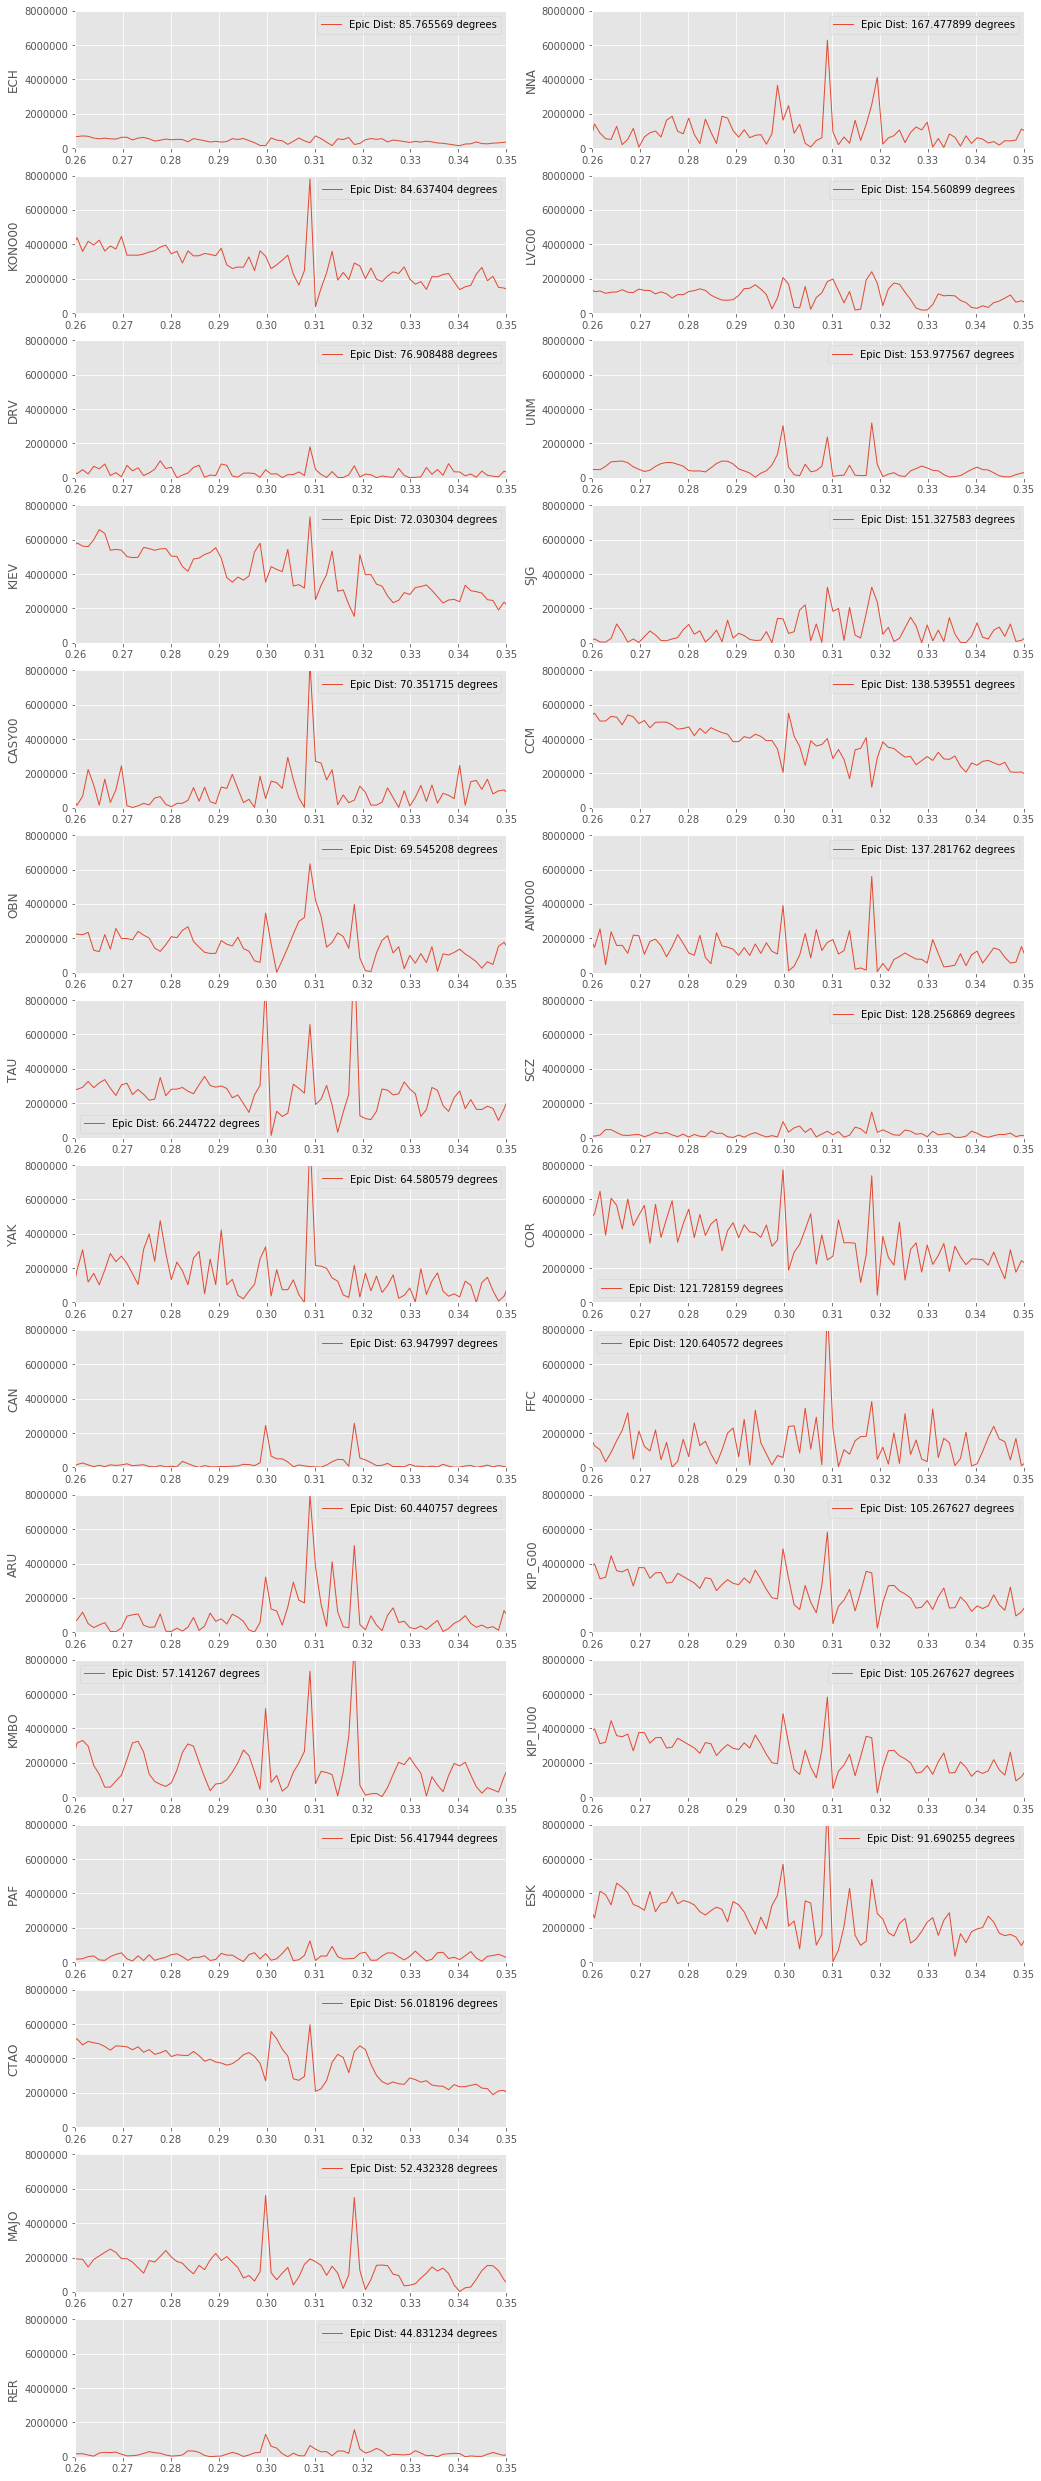

In [101]:
# station list sorted by distance to the epicenter (largest to lowest)
sta_list_dist=pd.read_csv('stationlist_sort_dist.csv', sep=',',header=None) 
sta_fname_dist=np.array(sta_list_dist[1])
sta_dist =sta_list_dist[8]


far = 12 #number of stations with more than 90 degrees epicentral distance
subplot_far = np.linspace (2,2*far,far)
near = 15 #number of stations with less than 90 degrees epicentral distance
subplot_near = np.linspace(1, 2*near-1, near)
plt.rcParams['figure.figsize'] = 17,(3*near)

for i in range (0,far):
    st1 = read (path.join(directory1, sta_fname_dist[i]),header=None )
    st1_copy = st1.copy()
    tr1 = st1_copy[0].data
    plt.subplot(near,2,subplot_far[i])
    plt.plot(freq*1000, abs(tr1), lw=1, label=('Epic Dist: %f degrees' % sta_dist[i]))
    plt.ylabel(sta_fname_dist[i])
    plt.xlim (0.26, 0.35)
    plt.ylim (0, 0.8E7)
    #plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    plt.legend()

for i in range (far,near+far):
    st1 = read (path.join(directory1, sta_fname_dist[i]),header=None )
    st1_copy = st1.copy()
    tr1 = st1_copy[0].data
    plt.subplot(near,2,subplot_near[i-far])
    plt.plot(freq*1000, abs(tr1), lw=1, label=('Epic Dist: %f degrees' % sta_dist[i]))
    plt.ylabel(sta_fname_dist[i])
    plt.xlim (0.26, 0.35)
    plt.ylim (0, 0.8E7)
    #plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    plt.legend()

plt.show()

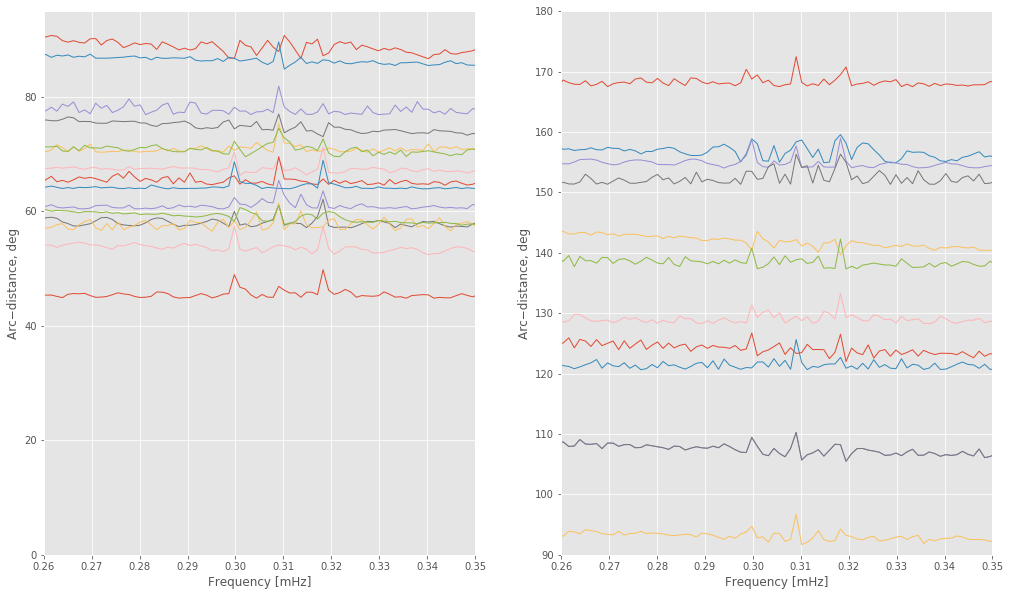

In [85]:
# plotting parameter
plt.rcParams['figure.figsize'] = 17,10
plt.rcParams['lines.linewidth'] = 1

dlat = 5

for i in range (0, len(sta_fname_dist)):
    st1 = read(path.join(directory1, sta_fname_dist[i]),header=None )
    st1_copy = st1.copy()
    tr1 = np.array(abs(st1_copy[0].data))   
    
    tr_max = tr1[225:302].max()
    tr1_dis = tr1/tr_max * dlat + abs(sta_dist[i])
    
    if sta_dist[i] < 90:
        plt.subplot(1,2,1)
        plt.plot(freq*1000, abs(tr1_dis))
        plt.ylabel('Arc−distance, deg')
        plt.ylim (0, 95)

    else: 
        plt.subplot(1,2,2)
        plt.plot(freq*1000, abs(tr1_dis))
        plt.ylabel('Arc−distance, deg')
        plt.ylim (90, 180)
            
    plt.xlabel('Frequency [mHz]')
    plt.xlim (0.26, 0.35)
    plt.legend()
    
plt.show()

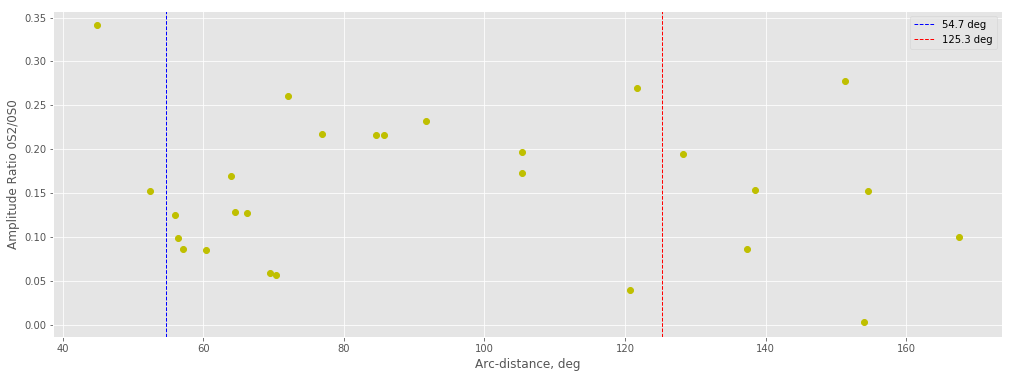

In [86]:
# station list sorted by distance to the epicenter (largest to lowest)
sta_list_dist=pd.read_csv('stationlist_sort_dist.csv', sep=',',header=None) 
sta_fname_dist=np.array(sta_list_dist[1])
sta_dist =sta_list_dist[8]

amp_ratio = np.divide(amp_0S2,amp_0S0)
plt.rcParams['figure.figsize'] = 17,6
plt.plot (sta_dist, amp_ratio, 'o', color='y')
plt.xlabel('Arc-distance, deg')
plt.ylabel('Amplitude Ratio 0S2/0S0')
plt.axvline(54.7, color='b', label='54.7 deg', linestyle='--')
plt.axvline(125.3, color='r', label='125.3 deg', linestyle='--')
plt.legend()
plt.show()

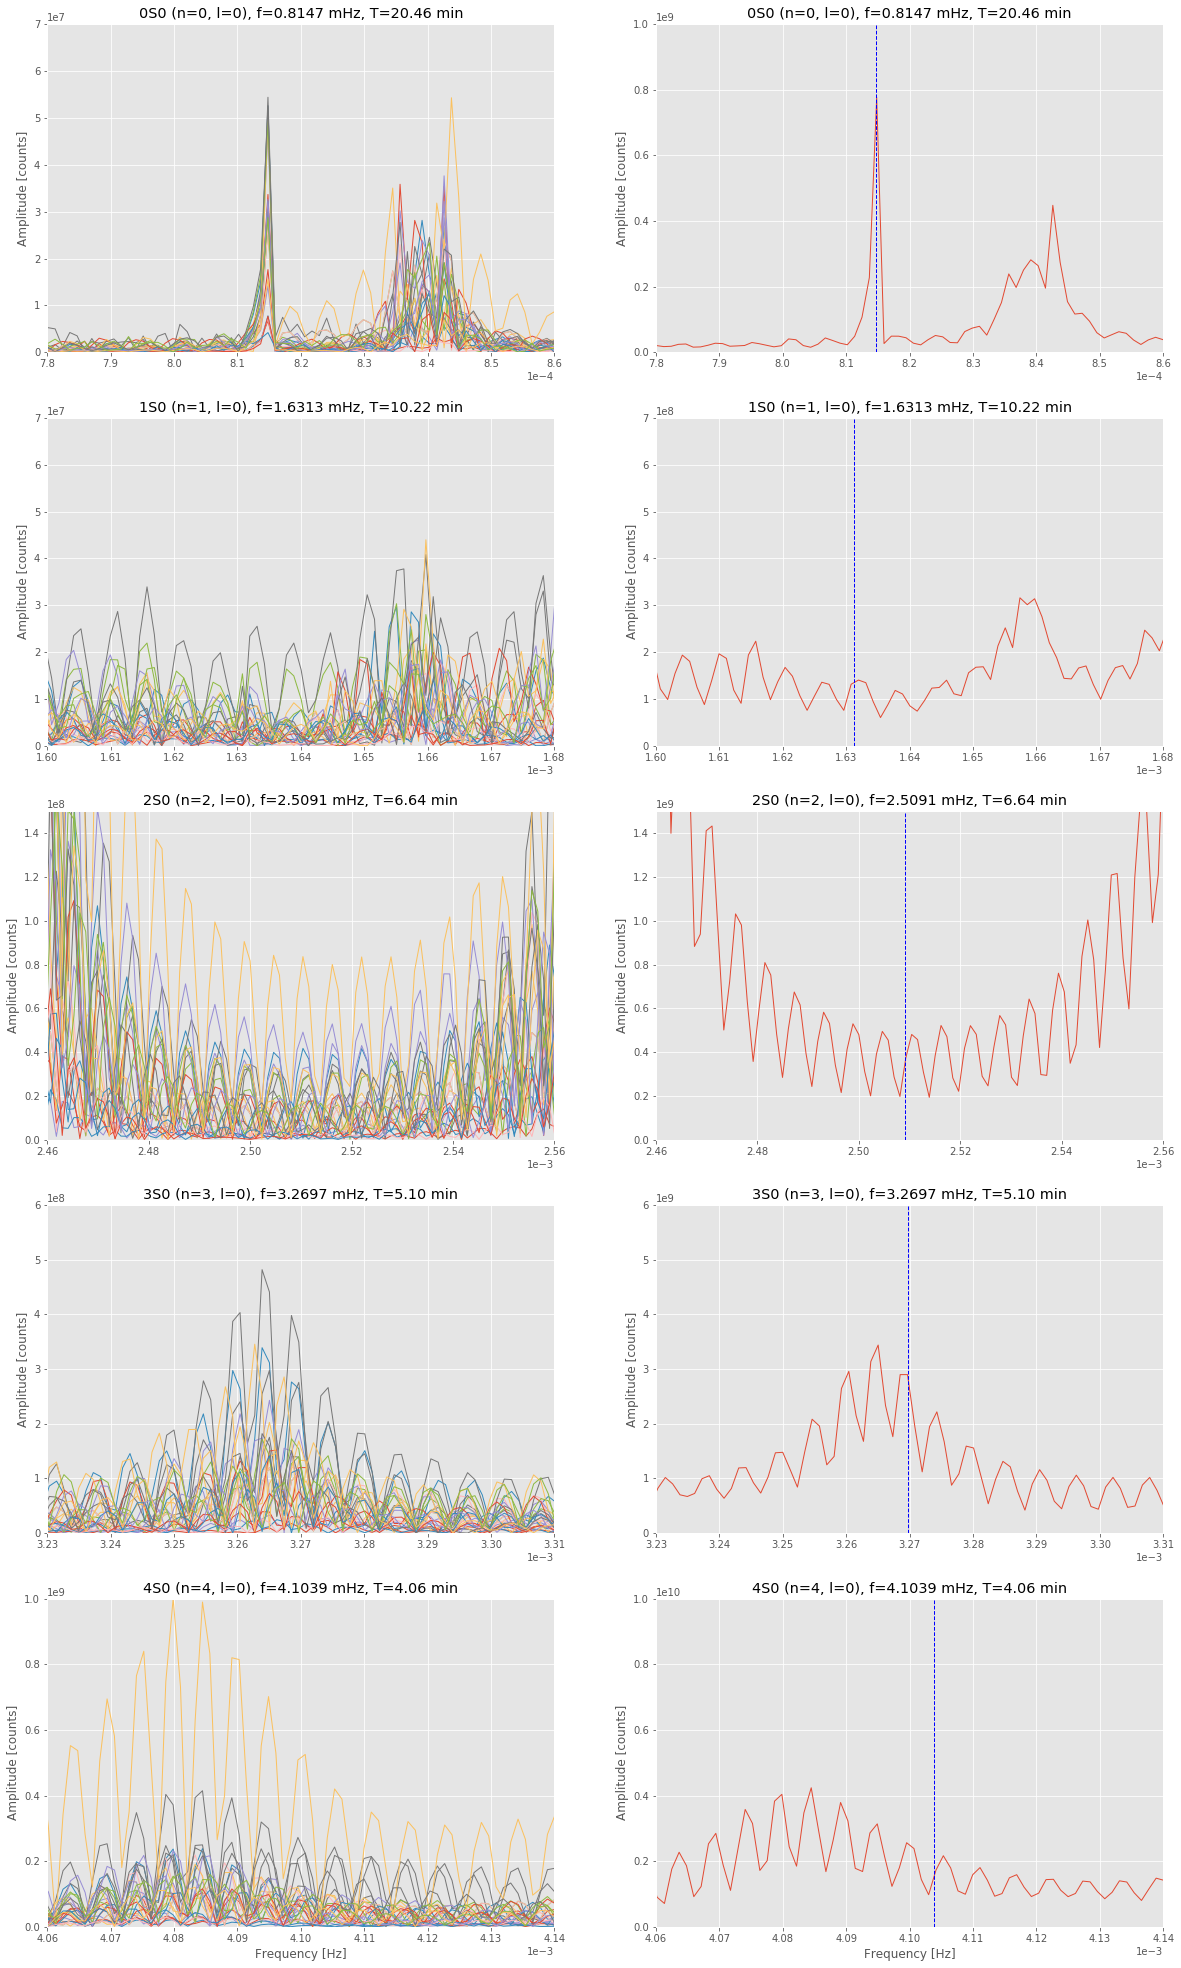

In [87]:
sta_fname_fft=np.array(sta_list_mode[1])

plt.rcParams['figure.figsize'] = 20, 35

for i in range (len(sta_fname_fft)):
    st1 = read (path.join(directory1, sta_fname_fft[i]),header=None )
    st1_copy = st1.copy()
    tr1 = st1_copy[0].data
    
    plt.subplot(521)
    plt.plot(freq, abs(tr1), lw=1)
    plt.title('0S0 (n=0, l=0), f=0.8147 mHz, T=20.46 min')
    plt.ylabel('Amplitude [counts]')
    plt.xlim (0.78E-3, 0.86E-3)
    plt.ylim (0, 0.7E8)
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    
    plt.subplot(523)
    plt.plot(freq, abs(tr1), lw=1)
    plt.title('1S0 (n=1, l=0), f=1.6313 mHz, T=10.22 min')
    plt.ylabel('Amplitude [counts]')
    plt.xlim (1.60E-3, 1.68E-3)
    plt.ylim (0, 0.7E8)
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    
    plt.subplot(525)
    plt.plot(freq, abs(tr1), lw=1)
    plt.title('2S0 (n=2, l=0), f=2.5091 mHz, T=6.64 min')
    plt.ylabel('Amplitude [counts]')
    plt.xlim (2.46E-3, 2.56E-3)
    plt.ylim (0, 1.5E8)
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    
    plt.subplot(527)
    plt.plot(freq, abs(tr1), lw=1)
    plt.title('3S0 (n=3, l=0), f=3.2697 mHz, T=5.10 min')
    plt.ylabel('Amplitude [counts]')
    plt.xlim (3.23E-3, 3.31E-3)
    plt.ylim (0, 6E8)
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    
    plt.subplot(529)
    plt.plot(freq, abs(tr1), lw=1)
    plt.title('4S0 (n=4, l=0), f=4.1039 mHz, T=4.06 min')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [counts]')
    plt.xlim (4.06E-3, 4.14E-3)
    plt.ylim (0, 1E9)
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    
plt.subplot(522)
plt.plot(freq, abs(stack_fft), lw=1)
plt.axvline(8147E-7, color='b', label='0.8147 mHz', lw=1, linestyle='--')
plt.title('0S0 (n=0, l=0), f=0.8147 mHz, T=20.46 min')
plt.ylabel('Amplitude [counts]')
plt.xlim (0.78E-3, 0.86E-3)
plt.ylim (0, 1E9)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.subplot(524)
plt.plot(freq, abs(stack_fft), lw=1)
plt.axvline(16313E-7, color='b', label='1.6313 mHz', lw=1, linestyle='--')
plt.title('1S0 (n=1, l=0), f=1.6313 mHz, T=10.22 min')
plt.ylabel('Amplitude [counts]')
plt.xlim (1.60E-3, 1.68E-3)
plt.ylim (0, 0.7E9)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
 
plt.subplot(526)
plt.plot(freq, abs(stack_fft), lw=1)
plt.axvline(25091E-7, color='b', label='2.5091 mHz', lw=1, linestyle='--')
plt.title('2S0 (n=2, l=0), f=2.5091 mHz, T=6.64 min')
plt.ylabel('Amplitude [counts]')
plt.xlim (2.46E-3, 2.56E-3)
plt.ylim (0, 1.5E9)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
 
plt.subplot(528)
plt.plot(freq, abs(stack_fft), lw=1)
plt.axvline(32697E-7, color='b', label='3.2697 mHz', lw=1, linestyle='--')
plt.title('3S0 (n=3, l=0), f=3.2697 mHz, T=5.10 min')
plt.ylabel('Amplitude [counts]')
plt.xlim (3.23E-3, 3.31E-3)
plt.ylim (0, 6E9)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    
plt.subplot(5,2,10)
plt.plot(freq, abs(stack_fft), lw=1)
plt.axvline(41039E-7, color='b', label='4.1039 mHz', lw=1, linestyle='--')
plt.title('4S0 (n=4, l=0), f=4.1039 mHz, T=4.06 min')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [counts]')
plt.xlim (4.06E-3, 4.14E-3)
plt.ylim (0, 1E10)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.show()